# **DL Lab 1**
## **Name: Soumyadeep Ganguly**
## **Reg No: 24MDT0082**


In [50]:
import numpy as np
import matplotlib.pyplot as plt

# **Q1**
## **McCulloch Pitts: OR Gate**

In [51]:
def mcp_or_gate(x1, x2):
    theta = 1 
    result = 1 if x1 + x2 >= theta else 0
    return result


In [52]:
print(mcp_or_gate(0, 0))

0


In [53]:
input_x1 = [0, 0, 1, 1]
input_x2 = [0, 1, 0, 1]

for i in range(len(input_x1)):
    res = mcp_or_gate(input_x1[i], input_x2[i])
    print(res)

0
1
1
1


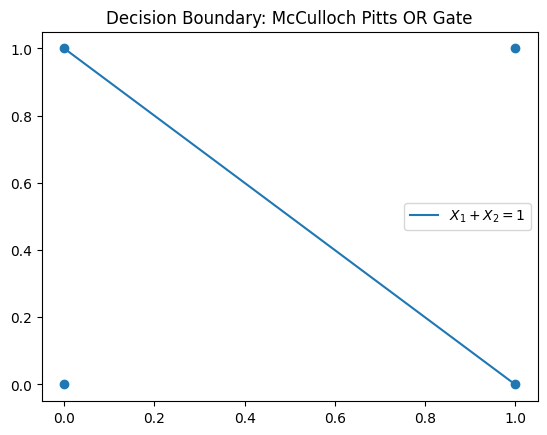

In [54]:
l1 = np.linspace(0, 1, 100)
l2 = 1 - l1
plt.scatter(input_x1, input_x2)
plt.title("Decision Boundary: McCulloch Pitts OR Gate")
plt.plot(l1, l2, label = '${X_1} + {X_2} = {1}$')
plt.legend()
plt.show()


## **McCulloch Pitts: AND Gate**

In [55]:
def mcp_and_gate(x1, x2):
    theta = 2 
    result = 1 if x1 + x2 >= theta else 0
    return result

In [56]:
for i in range(len(input_x1)):
    print(mcp_and_gate(input_x1[i], input_x2[i]))

0
0
0
1


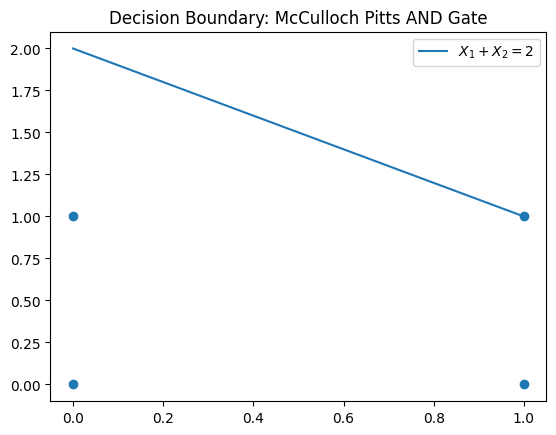

In [57]:
l1 = np.linspace(0, 1, 100)
l2 = 2 - l1
plt.scatter(input_x1, input_x2)
plt.title("Decision Boundary: McCulloch Pitts AND Gate")
plt.plot(l1, l2, label = '${X_1} + {X_2} = {2}$')
plt.legend()
plt.show()

# **Q2: Perceptron Learning Algorithm**

In [58]:
X = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])  


OR   = np.array([0, 1, 1, 1])
AND  = np.array([0, 0, 0, 1])
NAND = np.array([1, 1, 1, 0])
NOR  = np.array([1, 0, 0, 0])


def train(X, y, epochs=10):
    w = np.zeros(X.shape[1])  

    for i in range(epochs):
        err = 0
        for xi, target in zip(X, y):
            res = np.dot(w, xi)
            if target == 1 and res < 0:
                w = w + xi  
                err += 1
            elif target == 0 and res >= 0:
                w = w - xi
                err += 1
        if err == 0:
            print(f"Converged after {i+1} epochs")
            break
    return w
        




In [59]:
print("Training OR gate:")
w_or = train(X, OR, epochs=10)
print("Final Weights (OR):", w_or)

print("\nTraining AND gate:")
w_and = train(X, AND, epochs=10)
print("Final Weights (AND):", w_and)

print("\nTraining NAND gate:")
w_nand = train(X, NAND, epochs=10)
print("Final Weights (NAND):", w_nand)

print("\nTraining NOR gate:")
w_nor = train(X, NOR, epochs=10)
print("Final Weights (NOR):", w_nor)

Training OR gate:
Converged after 4 epochs
Final Weights (OR): [-1.  1.  1.]

Training AND gate:
Converged after 6 epochs
Final Weights (AND): [-3.  2.  1.]

Training NAND gate:
Converged after 6 epochs
Final Weights (NAND): [ 2. -2. -1.]

Training NOR gate:
Converged after 4 epochs
Final Weights (NOR): [ 0. -1. -1.]


# **Q3: XOR function**

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [61]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

In [62]:
model = Sequential()
model.add(Dense(4, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

e:\VIT Study Materials\SEM 3\Deep Learning\LAB\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])


In [64]:
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step - accuracy: 0.5000 - loss: 0.8586
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.8575
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.8564
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5000 - loss: 0.8554
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5000 - loss: 0.8543
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5000 - loss: 0.8533
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5000 - loss: 0.8522
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5000 - loss: 0.8512
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.8501
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5000 - loss: 0.8491
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.8480
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - l

In [65]:
pred = model.predict(X)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[0.27791783]
 [0.2683039 ]
 [0.35182717]
 [0.34041095]]
